In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1') #load csv file

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [94]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# **Data Preprocessing**

In [95]:
df.isnull().sum()    #check no of null values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [96]:
#droped 'Duration' , 'Year', and 'Name' column as it has too many missing values
df.dropna(subset=['Name', 'Year'], inplace=True)
df.drop(columns=['Duration'], inplace=True)

In [97]:
#imputing missing 'Genre' values with the mode (most frequent genre),'Rating' values with the median rating
#and 'Director' values with a placeholder value 'Unknown'.
mode_genre = df['Genre'].mode()[0]
df['Genre'].fillna(mode_genre, inplace=True)
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)
df['Director'].fillna('Unknown', inplace=True)

In [98]:
#converted categorical actor columns to numerical using label encoding
actor_cols = ['Actor 1', 'Actor 2', 'Actor 3']
for col in actor_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [99]:
# Remove parentheses from 'Year' column and convert it to int
df['Year'] = df['Year'].astype(str).str.strip('()').astype(int)

# Now, let's convert the 'Votes' column from string to int
# Remove commas and 'M' character from 'Votes' column
df['Votes'] = df['Votes'].str.replace(',', '').str.replace('M', '')

# Convert the 'Votes' column to numeric, handling missing values
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Now, let's handle missing values
imputer = SimpleImputer(strategy='median')  # Use median for imputation
df['Votes'] = imputer.fit_transform(df['Votes'].values.reshape(-1, 1)).astype(int)


In [100]:
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,8,Gaurav Bakshi,3162,4606,510
2,#Homecoming,2021,"Drama, Musical",6.0,55,Soumyajit Majumdar,3573,2768,3329
3,#Yaaram,2019,"Comedy, Romance",4.4,35,Ovais Khan,2817,1447,3875
4,...And Once Again,2010,Drama,6.0,55,Amol Palekar,3001,3340,392
5,...Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,872,115,3690


In [101]:
print(df.isnull().sum())


Name        0
Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [102]:
df.nunique()

Name        13344
Year          102
Genre         474
Rating         84
Votes        2033
Director     5665
Actor 1      4536
Actor 2      4703
Actor 3      4646
dtype: int64

### **Feature Engineering**

In [103]:
#used Target encoding where we calcluate a group aggregation (mean) for each column and subsitute the data with mean values.
#performing mean encoding
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)
df.head()

,Name,Year,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
1,#Gadhvi (He thought he was Gandhi),2019,7.0,6.1,5.6,7.0,6.8,7.0,7.0
2,#Homecoming,2021,6.0,6.4,6.0,6.0,6.5,6.9,6.0
3,#Yaaram,2019,4.4,5.8,5.9,4.4,5.4,4.4,4.4
4,...And Once Again,2010,6.0,6.1,6.0,6.3,6.8,5.8,5.6
5,...Aur Pyaar Ho Gaya,1997,4.7,6.2,4.8,5.4,4.9,5.8,5.9


### **Build Model**

In [104]:
#Splitting the Data for traning
X = df[[ 'Year', 'Votes encoded', 'Genre encoded','Director encoded','Actor 1 encoded', 'Actor 2 encoded', 'Actor 3 encoded']]
y = df['Rating']

In [105]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
#selected linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [107]:
#model evalution
y_pred = model.predict(X_test)
y_pred[:10]

array([5.61442151, 5.7873001 , 6.16170577, 6.03502614, 5.89437424,
       5.87376106, 6.07073072, 6.14982831, 5.55128881, 4.87152648])

In [108]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.34226231664786994
Mean Squared Error: 0.2646161049302755
R-squared: 0.7496168488704962


In [109]:
df_final = X_test
df_final['Predicted_Rating'] = y_pred
df_final

,Year,Votes encoded,Genre encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded,Predicted_Rating
5763,1992,6.0,5.9,5.9,5.9,4.8,5.7,5.614422
10108,2020,6.0,6.1,6.0,4.7,6.0,6.1,5.787300
10170,2015,6.0,5.9,6.0,6.1,6.1,6.1,6.161706
5782,2018,6.0,5.5,6.0,6.0,6.0,6.0,6.035026
11147,2021,6.0,6.1,6.0,5.0,6.1,6.1,5.894374
...,...,...,...,...,...,...,...,...
10084,1967,6.0,6.1,6.1,6.1,6.1,6.1,6.169407
851,1933,6.2,6.1,6.0,7.2,7.2,6.4,6.829122
1689,1953,6.0,6.1,6.4,5.9,6.1,6.1,6.216316
9337,1999,6.2,5.9,5.3,6.9,5.1,6.4,6.018468


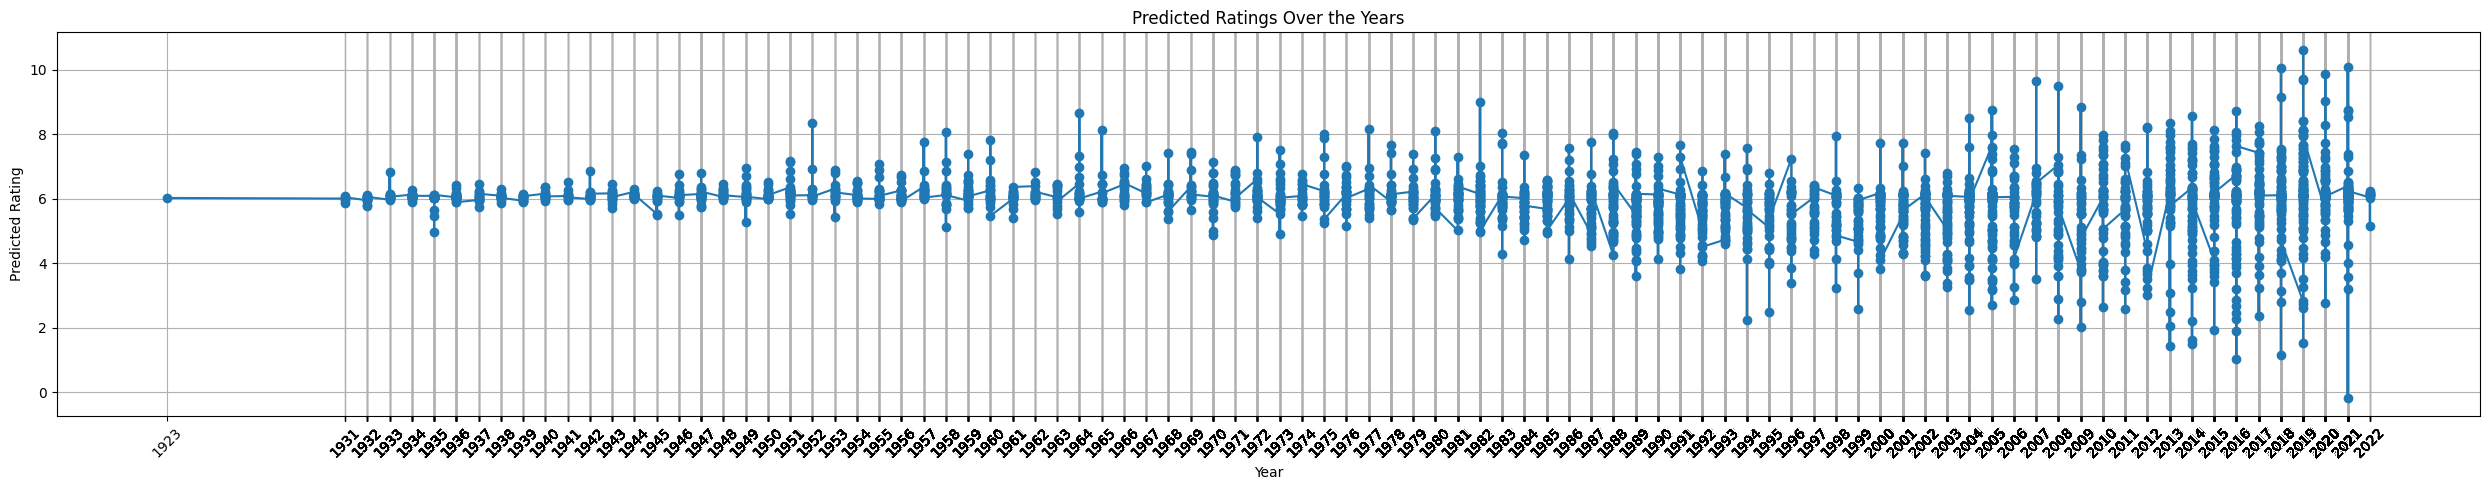

In [123]:
df_final.sort_values(by='Year', inplace=True)

# Plotting
plt.figure(figsize=(25, 5))
plt.plot(df_final['Year'], df_final['Predicted_Rating'], marker='o', linestyle='-')
plt.title('Predicted Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.xticks(df_final['Year'], rotation=45)
plt.tight_layout()
plt.show()


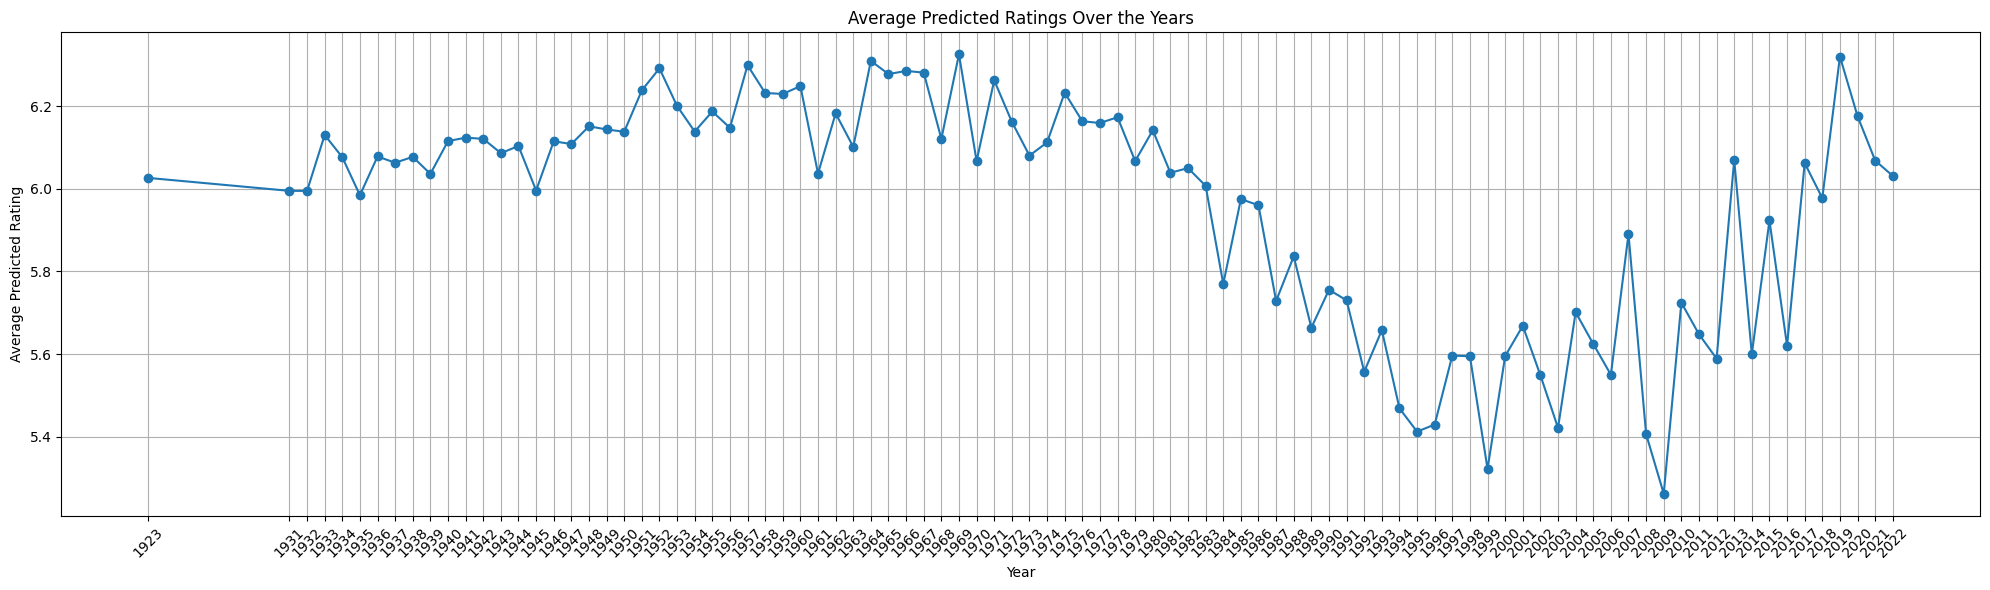

In [122]:
average_rating_by_year = df_final.groupby('Year')['Predicted_Rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(average_rating_by_year['Year'], average_rating_by_year['Predicted_Rating'], marker='o', linestyle='-')
plt.title('Average Predicted Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Predicted Rating')
plt.grid(True)
plt.xticks(average_rating_by_year['Year'], rotation=45)
plt.tight_layout()
plt.show()